<a href="https://colab.research.google.com/github/Keithchocho/FinalGolfriend/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

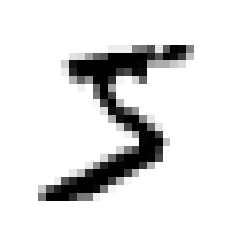

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)  #이미지 28x28 배열 크기로 출력햅좌


plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()


In [5]:
y[0]

'5'

In [6]:
# y 를 정수로 변환
import numpy as np

y = y.astype(np.uint8)

In [7]:
#훈련세트 검증세트

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [8]:
#이진 분류기 훈련 
#5를 제외한 숫자를 모두 false 처리해보겠다
#이진 분류를 위한 타깃 벡터 작성


y_train_5 = (y_train ==5 ) #5는 True, else is all False
y_test_5 = (y_test == 5) 

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
## 성능 측정
#교차 검증을 활용해 보자


from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits =3, random_state =42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_trian_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]


  clone_clf.fit(X_train_folds, y_trian_folds)
  y_pred =  clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/ len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [15]:
#cross_val_score 함수로 폴드가 3개인 K-겹 교차 검증 사용해보기

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
#이번에는 5가 아닌 다른 숫자를 분류하는 클래스를 만들어보자

from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):
  
  def fit(self, X, y = None):
    return self

  def predict(self, X):
    return np.zeros((len(X),1) , dtype = bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train,y_train_5, cv = 3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])